##### Copyright 2018 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Basic classification: Classify images of clothing

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This guide trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as you go.

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.2


## Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and [load the Fashion MNIST data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) directly from TensorFlow:

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [ ]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [ ]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [ ]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [ ]:
len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

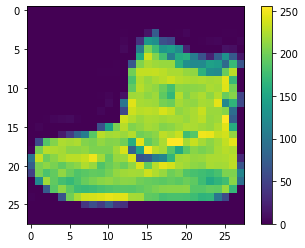

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

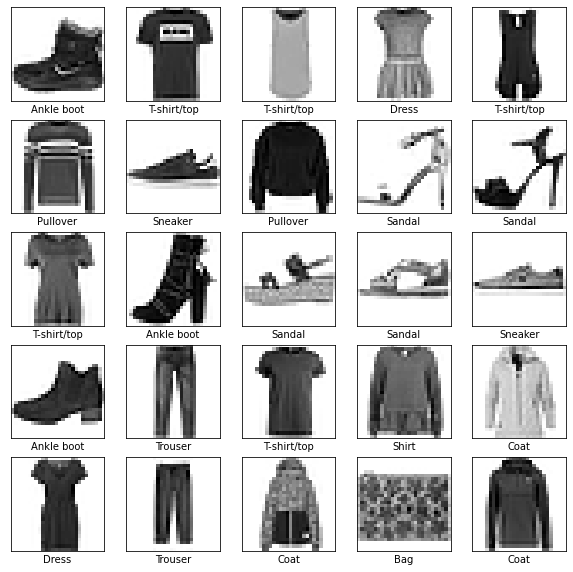

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the [*layer*](https://www.tensorflow.org/api_docs/python/tf/keras/layers). Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's [*compile*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) step:

* [*Loss function*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* [*Optimizer*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) —This is how the model is updated based on the data it sees and its loss function.
* [*Metrics*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


### Feed the model

To start training,  call the [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method—so called because it "fits" the model to the training data:

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 2ms/step - loss: 0.4980 - accuracy: 0.8247
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3731 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3366 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3110 - accuracy: 0.8859
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2949 - accuracy: 0.8897
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2811 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2670 - accuracy: 0.9017
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2577 - accuracy: 0.9054
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2469 - accuracy: 0.9087
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.237

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3397 - accuracy: 0.8818 - 770ms/epoch - 2ms/step

Test accuracy: 0.8817999958992004


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:
*   [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
*   [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### Make predictions

With the model trained, you can use it to make predictions about some images.
Attach a softmax layer to convert the model's linear outputs—[logits](https://developers.google.com/machine-learning/glossary#logits)—to probabilities, which should be easier to interpret.

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [ ]:
predictions[0]

array([2.8113820e-10, 2.3308346e-09, 9.3664454e-09, 3.0216429e-10,
       3.1842706e-08, 6.8198198e-05, 4.2446803e-08, 7.7312002e-03,
       9.3269804e-08, 9.9220043e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [ ]:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [ ]:
test_labels[0]

9

Graph this to look at the full set of 10 class predictions.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

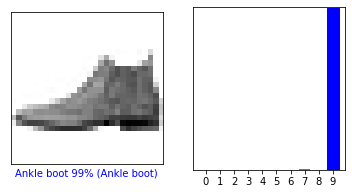

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

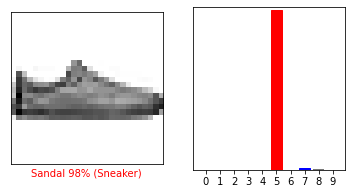

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

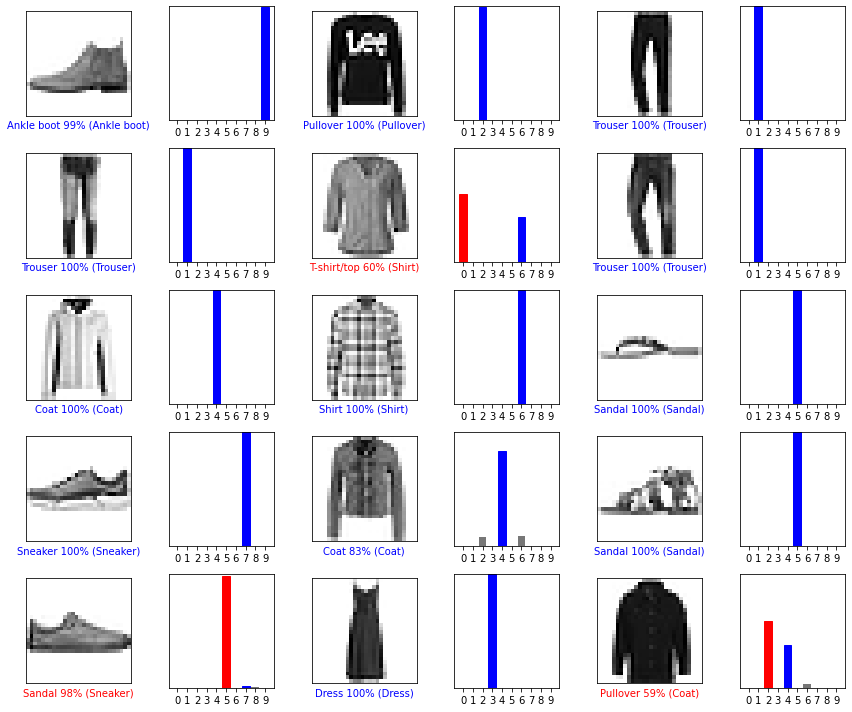

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[6.1953629e-05 2.2284485e-11 9.9882549e-01 2.7995268e-09 2.8187208e-04
  3.0025643e-10 8.3068764e-04 4.3227911e-15 2.0453041e-09 1.9611132e-13]]


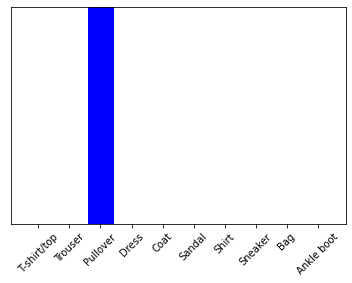

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`tf.keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [ ]:
np.argmax(predictions_single[0])

2

And the model predicts a label as expected.

# Student Code

In [ ]:
#Split the training images into train and validation images. 50k train, 10k val
val_images = train_images[50000:, :]
train_images = train_images[:50000, :]
print(train_images.shape)
print(val_images.shape)

(50000, 28, 28)
(10000, 28, 28)


In [ ]:
val_labels = train_labels[50000:]
train_labels = train_labels[:50000]
print(len(train_labels))
print(len(val_labels))

50000
10000


In [ ]:
training = model.fit(train_images, train_labels, validation_data=(val_images, val_labels),epochs=10)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2285 - accuracy: 0.9138 - val_loss: 0.2388 - val_accuracy: 0.9074
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2186 - accuracy: 0.9182 - val_loss: 0.2409 - val_accuracy: 0.9093
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2144 - accuracy: 0.9199 - val_loss: 0.2316 - val_accuracy: 0.9131
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2071 - accuracy: 0.9215 - val_loss: 0.2502 - val_accuracy: 0.9050
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2002 - accuracy: 0.9256 - val_loss: 0.2458 - val_accuracy: 0.9079
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1953 - accuracy: 0.9274 - val_loss: 0.2540 - val_accuracy: 0.9074
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1893 - accuracy: 0.9290 - val_loss: 0.2769 - val_accuracy:

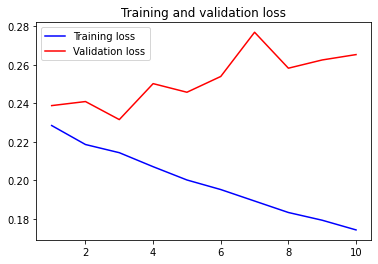

In [ ]:
history = training.history
epochs = range(1, len(training.history['accuracy']) + 1)

plt.plot(epochs, history['loss'], 'b', label ='Training loss')
plt.plot(epochs, history['val_loss'], 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

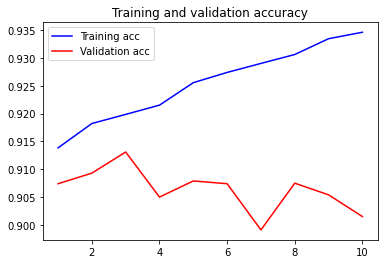

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, history['accuracy'], 'b', label='Training acc')
plt.plot(epochs, history['val_accuracy'], 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

The training loss is decreasing steadily, but the validation loss seems to be gradually increasing and overfitting. There is a large gap between training and validation loss which means the model is overfitting. The validation loss ends on a dip decrease but after training for 30 epochs we see that it is not improving overall, it is still increasing.

In [ ]:
training = model.fit(train_images, train_labels, validation_data=(val_images, val_labels),epochs=30)

Epoch 1/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1710 - accuracy: 0.9361 - val_loss: 0.2817 - val_accuracy: 0.9001
Epoch 2/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1647 - accuracy: 0.9387 - val_loss: 0.2693 - val_accuracy: 0.9066
Epoch 3/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1626 - accuracy: 0.9390 - val_loss: 0.2673 - val_accuracy: 0.9052
Epoch 4/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1562 - accuracy: 0.9426 - val_loss: 0.2704 - val_accuracy: 0.9067
Epoch 5/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1542 - accuracy: 0.9422 - val_loss: 0.3006 - val_accuracy: 0.8961
Epoch 6/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1480 - accuracy: 0.9454 - val_loss: 0.2932 - val_accuracy: 0.9000
Epoch 7/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1468 - accuracy: 0.9451 - val_loss: 0.3102 - val_accuracy:

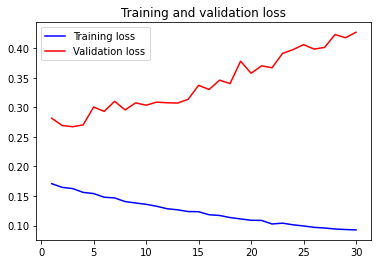

In [ ]:
history = training.history
epochs = range(1, len(training.history['accuracy']) + 1)
plt.plot(epochs, history['loss'], 'b', label ='Training loss')
plt.plot(epochs, history['val_loss'], 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
import random
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
#create a learning_rate schedule
from tensorflow import keras
lr_schedule = keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=1e-3,
    alpha=1e-2,
    decay_steps=10000)
opt = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [ ]:
model2.compile(optimizer=opt,
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [ ]:
training2 = model2.fit(train_images, train_labels, validation_data=(val_images, val_labels),epochs=10)

Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 1.4454 - accuracy: 0.5602 - val_loss: 1.0552 - val_accuracy: 0.6803
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9431 - accuracy: 0.7027 - val_loss: 0.8582 - val_accuracy: 0.7261
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8208 - accuracy: 0.7365 - val_loss: 0.7845 - val_accuracy: 0.7462
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7687 - accuracy: 0.7501 - val_loss: 0.7504 - val_accuracy: 0.7568
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7452 - accuracy: 0.7569 - val_loss: 0.7365 - val_accuracy: 0.7598
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7365 - accuracy: 0.7597 - val_loss: 0.7325 - val_accuracy: 0.7608
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7347 - accuracy: 0.7603 - val_loss: 0.7318 - val_accuracy:

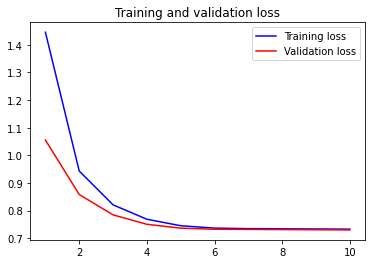

In [ ]:
history2 = training2.history
epochs = range(1, len(training2.history['accuracy']) + 1)
plt.plot(epochs, history2['loss'], 'b', label ='Training loss')
plt.plot(epochs, history2['val_loss'], 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
#SGD with momentum
model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
opt = tf.keras.optimizers.SGD(momentum=0.98, nesterov=True)
model3.compile(optimizer=opt,
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [ ]:
training3 = model3.fit(train_images, train_labels, validation_data=(val_images, val_labels),epochs=10)

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5312 - accuracy: 0.8122 - val_loss: 0.4805 - val_accuracy: 0.8342
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4347 - accuracy: 0.8445 - val_loss: 0.4224 - val_accuracy: 0.8515
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3996 - accuracy: 0.8553 - val_loss: 0.4317 - val_accuracy: 0.8414
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3912 - accuracy: 0.8587 - val_loss: 0.4466 - val_accuracy: 0.8434
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3660 - accuracy: 0.8680 - val_loss: 0.4014 - val_accuracy: 0.8568
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3615 - accuracy: 0.8695 - val_loss: 0.4309 - val_accuracy: 0.8581
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3473 - accuracy: 0.8730 - val_loss: 0.3926 - val_accuracy:

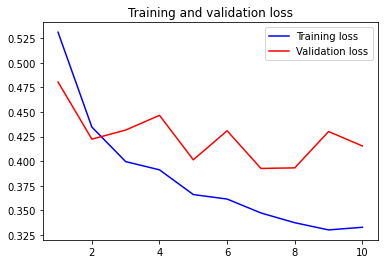

In [ ]:
history3 = training3.history
epochs = range(1, len(training3.history['accuracy']) + 1)
plt.plot(epochs, history3['loss'], 'b', label ='Training loss')
plt.plot(epochs, history3['val_loss'], 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
#batch normalization
from keras.layers import BatchNormalization
from tensorflow.keras import layers

def batchnormalization_model(input_shape):
    input = keras.Input(shape=input_shape)
    #input layer
    x = tf.keras.layers.Flatten()(input)

    #hidden layer
    x = tf.keras.layers.Dense(128)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)

    #output layer
    output = tf.keras.layers.Dense(10)(x)
    model = keras.Model(inputs=input, outputs=output)
    return model

model4 = batchnormalization_model(input_shape=(28,28))
print(model4.summary())


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                             

In [ ]:
model4.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [ ]:
training4 = model4.fit(train_images, train_labels, validation_data=(val_images, val_labels),epochs=10)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4778 - accuracy: 0.8309 - val_loss: 0.4297 - val_accuracy: 0.8441
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3677 - accuracy: 0.8660 - val_loss: 0.3764 - val_accuracy: 0.8619
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3315 - accuracy: 0.8808 - val_loss: 0.3513 - val_accuracy: 0.8734
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3075 - accuracy: 0.8883 - val_loss: 0.3550 - val_accuracy: 0.8718
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2871 - accuracy: 0.8946 - val_loss: 0.3413 - val_accuracy: 0.8797
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2731 - accuracy: 0.8994 - val_loss: 0.3623 - val_accuracy: 0.8691
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2563 - accuracy: 0.9045 - val_loss: 0.3305 - val_accuracy:

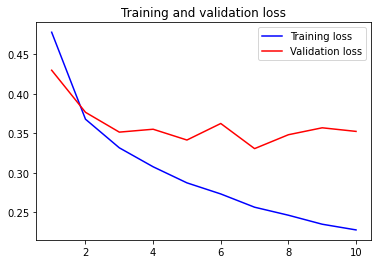

In [ ]:
history4 = training4.history
epochs = range(1, len(training4.history['accuracy']) + 1)
plt.plot(epochs, history4['loss'], 'b', label ='Training loss')
plt.plot(epochs, history4['val_loss'], 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Out of the three models we created, it seems like the learning rate scheduling performed the best and helped improve the learning because the training and validation loss lines are closer together as well as gradually decreasing.

In [ ]:
#add more layers to reduce training loss futher until your model starts overfitting
from keras.layers import BatchNormalization

def build_more_layers(input_shape):
    input = keras.Input(shape=input_shape)
    #input layer
    x = tf.keras.layers.Flatten()(input)

    #hidden layer 1
    x = tf.keras.layers.Dense(128)(x)
    x= layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)

    #hidden layer 2
    x = tf.keras.layers.Dense(64)(x)
    x= layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)

    #hidden layer 3
    #x = tf.keras.layers.Dense(32)(x)
    #x= layers.BatchNormalization()(x)
    #x = tf.keras.layers.ReLU()(x)

    #output layer
    output = tf.keras.layers.Dense(10)(x)
    model = keras.Model(inputs=input, outputs=output)
    return model

model5 = build_more_layers(input_shape=(28,28))
print(model5.summary())


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 re_lu_1 (ReLU)              (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                           

In [ ]:
lr_schedule = keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=1e-3,
    alpha=1e-2,
    decay_steps=10000)
opt = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [ ]:
model5.compile(optimizer=opt,
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [ ]:
training5 = model5.fit(train_images, train_labels, validation_data=(val_images, val_labels),epochs=20)

Epoch 1/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1948 - accuracy: 0.6369 - val_loss: 0.8301 - val_accuracy: 0.7503
Epoch 2/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7912 - accuracy: 0.7597 - val_loss: 0.6787 - val_accuracy: 0.7858
Epoch 3/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6936 - accuracy: 0.7821 - val_loss: 0.6175 - val_accuracy: 0.8002
Epoch 4/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6510 - accuracy: 0.7939 - val_loss: 0.5887 - val_accuracy: 0.8055
Epoch 5/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6301 - accuracy: 0.7992 - val_loss: 0.5776 - val_accuracy: 0.8095
Epoch 6/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6244 - accuracy: 0.7996 - val_loss: 0.5740 - val_accuracy: 0.8098
Epoch 7/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6184 - accuracy: 0.8002 - val_loss: 0.5737 - val_accuracy:

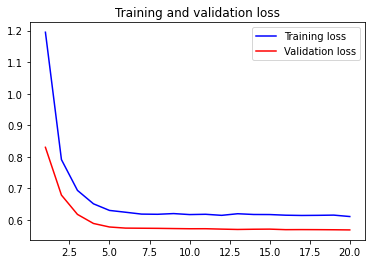

In [ ]:
history5 = training5.history
epochs = range(1, len(training5.history['accuracy']) + 1)
plt.plot(epochs, history5['loss'], 'b', label ='Training loss')
plt.plot(epochs, history5['val_loss'], 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
#regularize the model
def build_regularized_model(input_shape):
    input = keras.Input(shape=input_shape)
    #input layer
    x = tf.keras.layers.Flatten()(input)

    #hidden layer 1
    x = tf.keras.layers.Dense(128)(x)
    x= layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x=layers.Dropout(0.3)(x)

    #hidden layer 2
    x = tf.keras.layers.Dense(64)(x)
    x= layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x=layers.Dropout(0.3)(x)

    #hidden layer 3
    #x = tf.keras.layers.Dense(32)(x)
    #x= layers.BatchNormalization()(x)
    #x = tf.keras.layers.ReLU()(x)
    #x=layers.Dropout(0.3)(x)

    #output layer
    output = tf.keras.layers.Dense(10)(x)
    model = keras.Model(inputs=input, outputs=output)
    return model

model6 = build_regularized_model(input_shape=(28,28))

In [ ]:
lr_schedule = keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=1e-3,
    alpha=1e-2,
    decay_steps=10000)
opt = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [ ]:
model6.compile(optimizer=opt,
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [ ]:
training6 = model6.fit(train_images, train_labels, validation_data=(val_images, val_labels),epochs=20)

Epoch 1/20
1563/1563 [==============================] - 9s 5ms/step - loss: 1.6496 - accuracy: 0.4534 - val_loss: 0.9654 - val_accuracy: 0.7268
Epoch 2/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1053 - accuracy: 0.6508 - val_loss: 0.7854 - val_accuracy: 0.7588
Epoch 3/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9688 - accuracy: 0.6887 - val_loss: 0.7152 - val_accuracy: 0.7694
Epoch 4/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9149 - accuracy: 0.7044 - val_loss: 0.6808 - val_accuracy: 0.7795
Epoch 5/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8804 - accuracy: 0.7123 - val_loss: 0.6652 - val_accuracy: 0.7833
Epoch 6/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8731 - accuracy: 0.7170 - val_loss: 0.6618 - val_accuracy: 0.7825
Epoch 7/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8656 - accuracy: 0.7207 - val_loss: 0.6598 - val_accuracy:

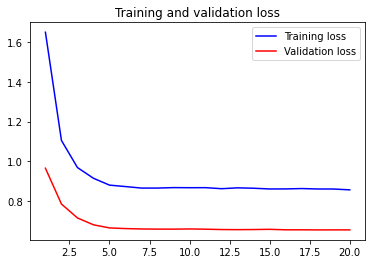

In [ ]:
history6 = training6.history
epochs = range(1, len(training6.history['accuracy']) + 1)
plt.plot(epochs, history6['loss'], 'b', label ='Training loss')
plt.plot(epochs, history6['val_loss'], 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 135 kB 7.5 MB/s 
     |████████████████████████████████| 1.6 MB 54.9 MB/s 


In [ ]:
#using hyperband to tune the hyperparameters, learning rate, num of layers, num of neurons, dropout rate, learning rate devay
#use early stopping, print best combinations

In [ ]:
def model_builder(hp):

  hp_units = hp.Int('units', min_value = 16, max_value = 512, step = 32)
  hp_num_layers = hp.Int('num_layers', min_value = 1, max_value = 10, step=1)
  hp_dropout_rate = hp.Float('dropout', min_value = 0,max_value = 0.5, step = 0.1)
  hp_learningrate=hp.Float("initial_learning_rate",min_value=1e-4, max_value=1e-2, sampling='log')
  hp_momentum=hp.Choice("momentum", values=(0.9, 0.99))
  hp_lr_decay_steps=hp.Choice("lr_decay_steps", values=(1000, 5000, 10000))
  hp_weight_decay=hp.Float("weight_decay",min_value=1e-3, max_value=1e-1, sampling='log')

  input = keras.Input(shape=(28,28))
  x = input

  x = layers.Flatten()(x)

  for _ in range(hp_num_layers):
    x=layers.Dense(hp_units, kernel_initializer=tf.keras.initializers.he_normal(seed=1), kernel_regularizer=tf.keras.regularizers.l2(hp_weight_decay))(x)
    x= layers.BatchNormalization()(x)
    x= layers.ReLU()(x)
    x=layers.Dropout(hp_dropout_rate)(x)

  output = tf.keras.layers.Dense(10)(x)
  model = keras.Model(inputs=input, outputs=output)

  lr_schedule = keras.optimizers.schedules.CosineDecay(
  initial_learning_rate=hp_learningrate,
  decay_steps=hp_lr_decay_steps, alpha=1e-2)

  opt = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=hp_momentum, nesterov=True)
  model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'], optimizer=opt)

  return model
  

In [ ]:
import keras_tuner as kt
tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy', 
                     max_epochs = 20,
                     factor = 3,
                     directory = 'hyperparameter_runs',
                     project_name = 'fashion')  

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, min_delta=1e-4, restore_best_weights=True)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, min_delta=1e-4, restore_best_weights=True)
tensorboard = keras.callbacks.TensorBoard(
log_dir="/content/drive/MyDrive/tensorboard_logs/hyperband",
histogram_freq=1
)
#remove the log directory if already exists
!rm -rf "/content/drive/MyDrive/tensorboard_logs/hyperband"
tuner.search(train_images, train_labels, validation_data = (val_images, val_labels), epochs = 10, callbacks=[early_stopping, tensorboard], verbose = 1)

Trial 30 Complete [00h 07m 23s]
val_accuracy: 0.8198999762535095

Best val_accuracy So Far: 0.8902000188827515
Total elapsed time: 01h 02m 05s


In [ ]:
best_hps=tuner.get_best_hyperparameters()[0]
best_model=tuner.get_best_models(num_models=1)[0]
print(f"""
The hyperparameter search is complete.
The optimal number of units  is {best_hps.get('units')}. 
The optimal number of layers  is {best_hps.get('num_layers')}. 
The optimal learning rate for the optimizer is {best_hps.get('initial_learning_rate')}. 
The optimal momentum for the optimizer is is {best_hps.get('momentum')}. 
The optimal dropout is {best_hps.get('dropout')}.  
The optimal decay_steps for cosine schedule is {best_hps.get('lr_decay_steps')}.
The optimal weight decay is {best_hps.get('weight_decay')}. 
""")


The hyperparameter search is complete.
The optimal number of units  is 240. 
The optimal number of layers  is 6. 
The optimal learning rate for the optimizer is 0.0022555445695595423. 
The optimal momentum for the optimizer is is 0.99. 
The optimal dropout is 0.0.  
The optimal decay_steps for cosine schedule is 1000.
The optimal weight decay is 0.0034185379844118894. 



In [ ]:
#evaluate the model on the test images, what is the accuracy of the best model on test data

In [ ]:
test_loss, test_acc = best_model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 2s 3ms/step - loss: 1.1626 - accuracy: 0.8857

Test accuracy: 0.885699987411499


In [ ]:
#Modify this code to plot the first 100 images in the test data that were incorrectly classified by your model.

In [ ]:
probability_model = tf.keras.Sequential([best_model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

print(np.argmax(predictions[0]))
print(test_labels[0])

9
9


In [ ]:
max_predictions = np.array([])
max_predictions

array([], dtype=float64)

In [ ]:
for i in predictions:
  max_predictions = np.append(max_predictions, (np.argmax(i)))

In [ ]:
max_predictions = max_predictions.astype(int)
max_predictions[0]

9

In [ ]:
#converted the probability model predictions on test images to an array of integers to be easier to read
#now test labels is an array of ints, and the predictions are array of ints
#I need to compare the two arrays to see if they match
incorrectly_classified = np.array([])

for i in range(len(max_predictions)):
  if max_predictions[i] != test_labels[i]:
    incorrectly_classified = np.append(incorrectly_classified, i)

In [ ]:
incorrectly_classified = incorrectly_classified.astype(int)
incorrectly_classified[0]

17

In [ ]:
incorrectly_classified[:100]

array([ 17,  23,  25,  40,  42,  49,  51,  66,  68, 103, 107, 135, 136,
       147, 150, 151, 153, 172, 192, 222, 227, 229, 239, 244, 255, 282,
       313, 316, 320, 324, 325, 355, 359, 361, 368, 374, 378, 379, 381,
       382, 389, 394, 396, 404, 406, 409, 413, 441, 444, 454, 457, 460,
       474, 490, 529, 531, 541, 548, 562, 565, 569, 572, 577, 584, 589,
       595, 634, 635, 639, 663, 664, 670, 681, 685, 688, 697, 701, 711,
       722, 725, 732, 753, 760, 787, 800, 801, 805, 851, 852, 860, 870,
       893, 894, 902, 905, 909, 910, 921, 926, 930])

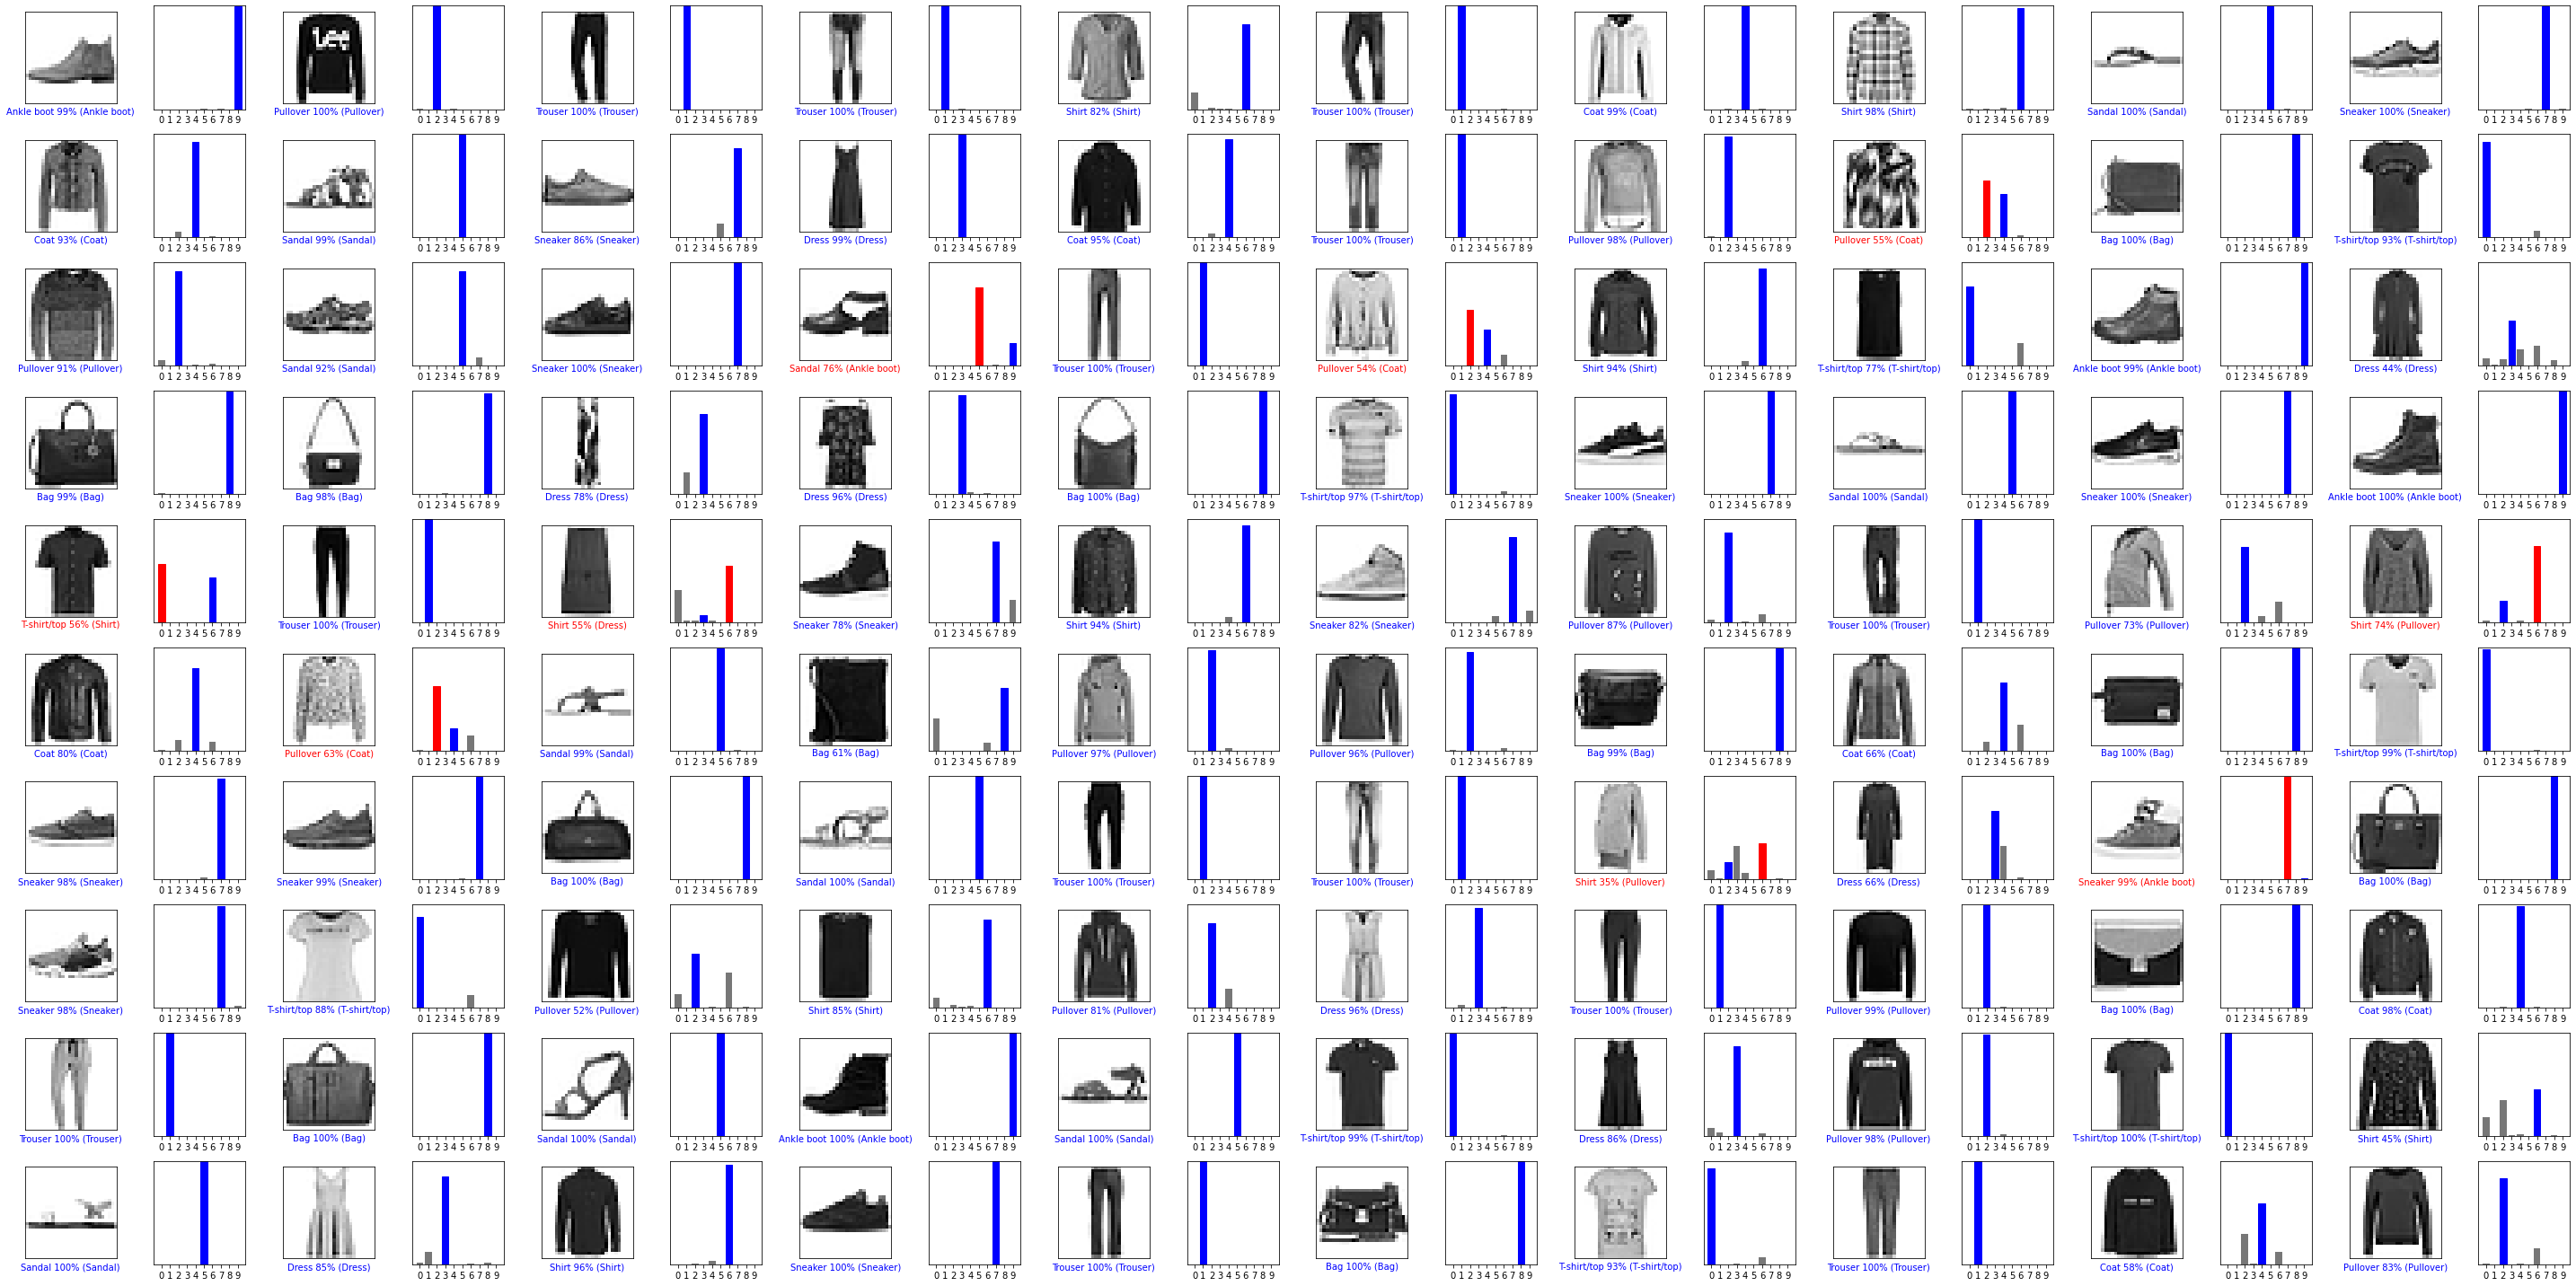

In [ ]:

num_rows = 10
num_cols = 10
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

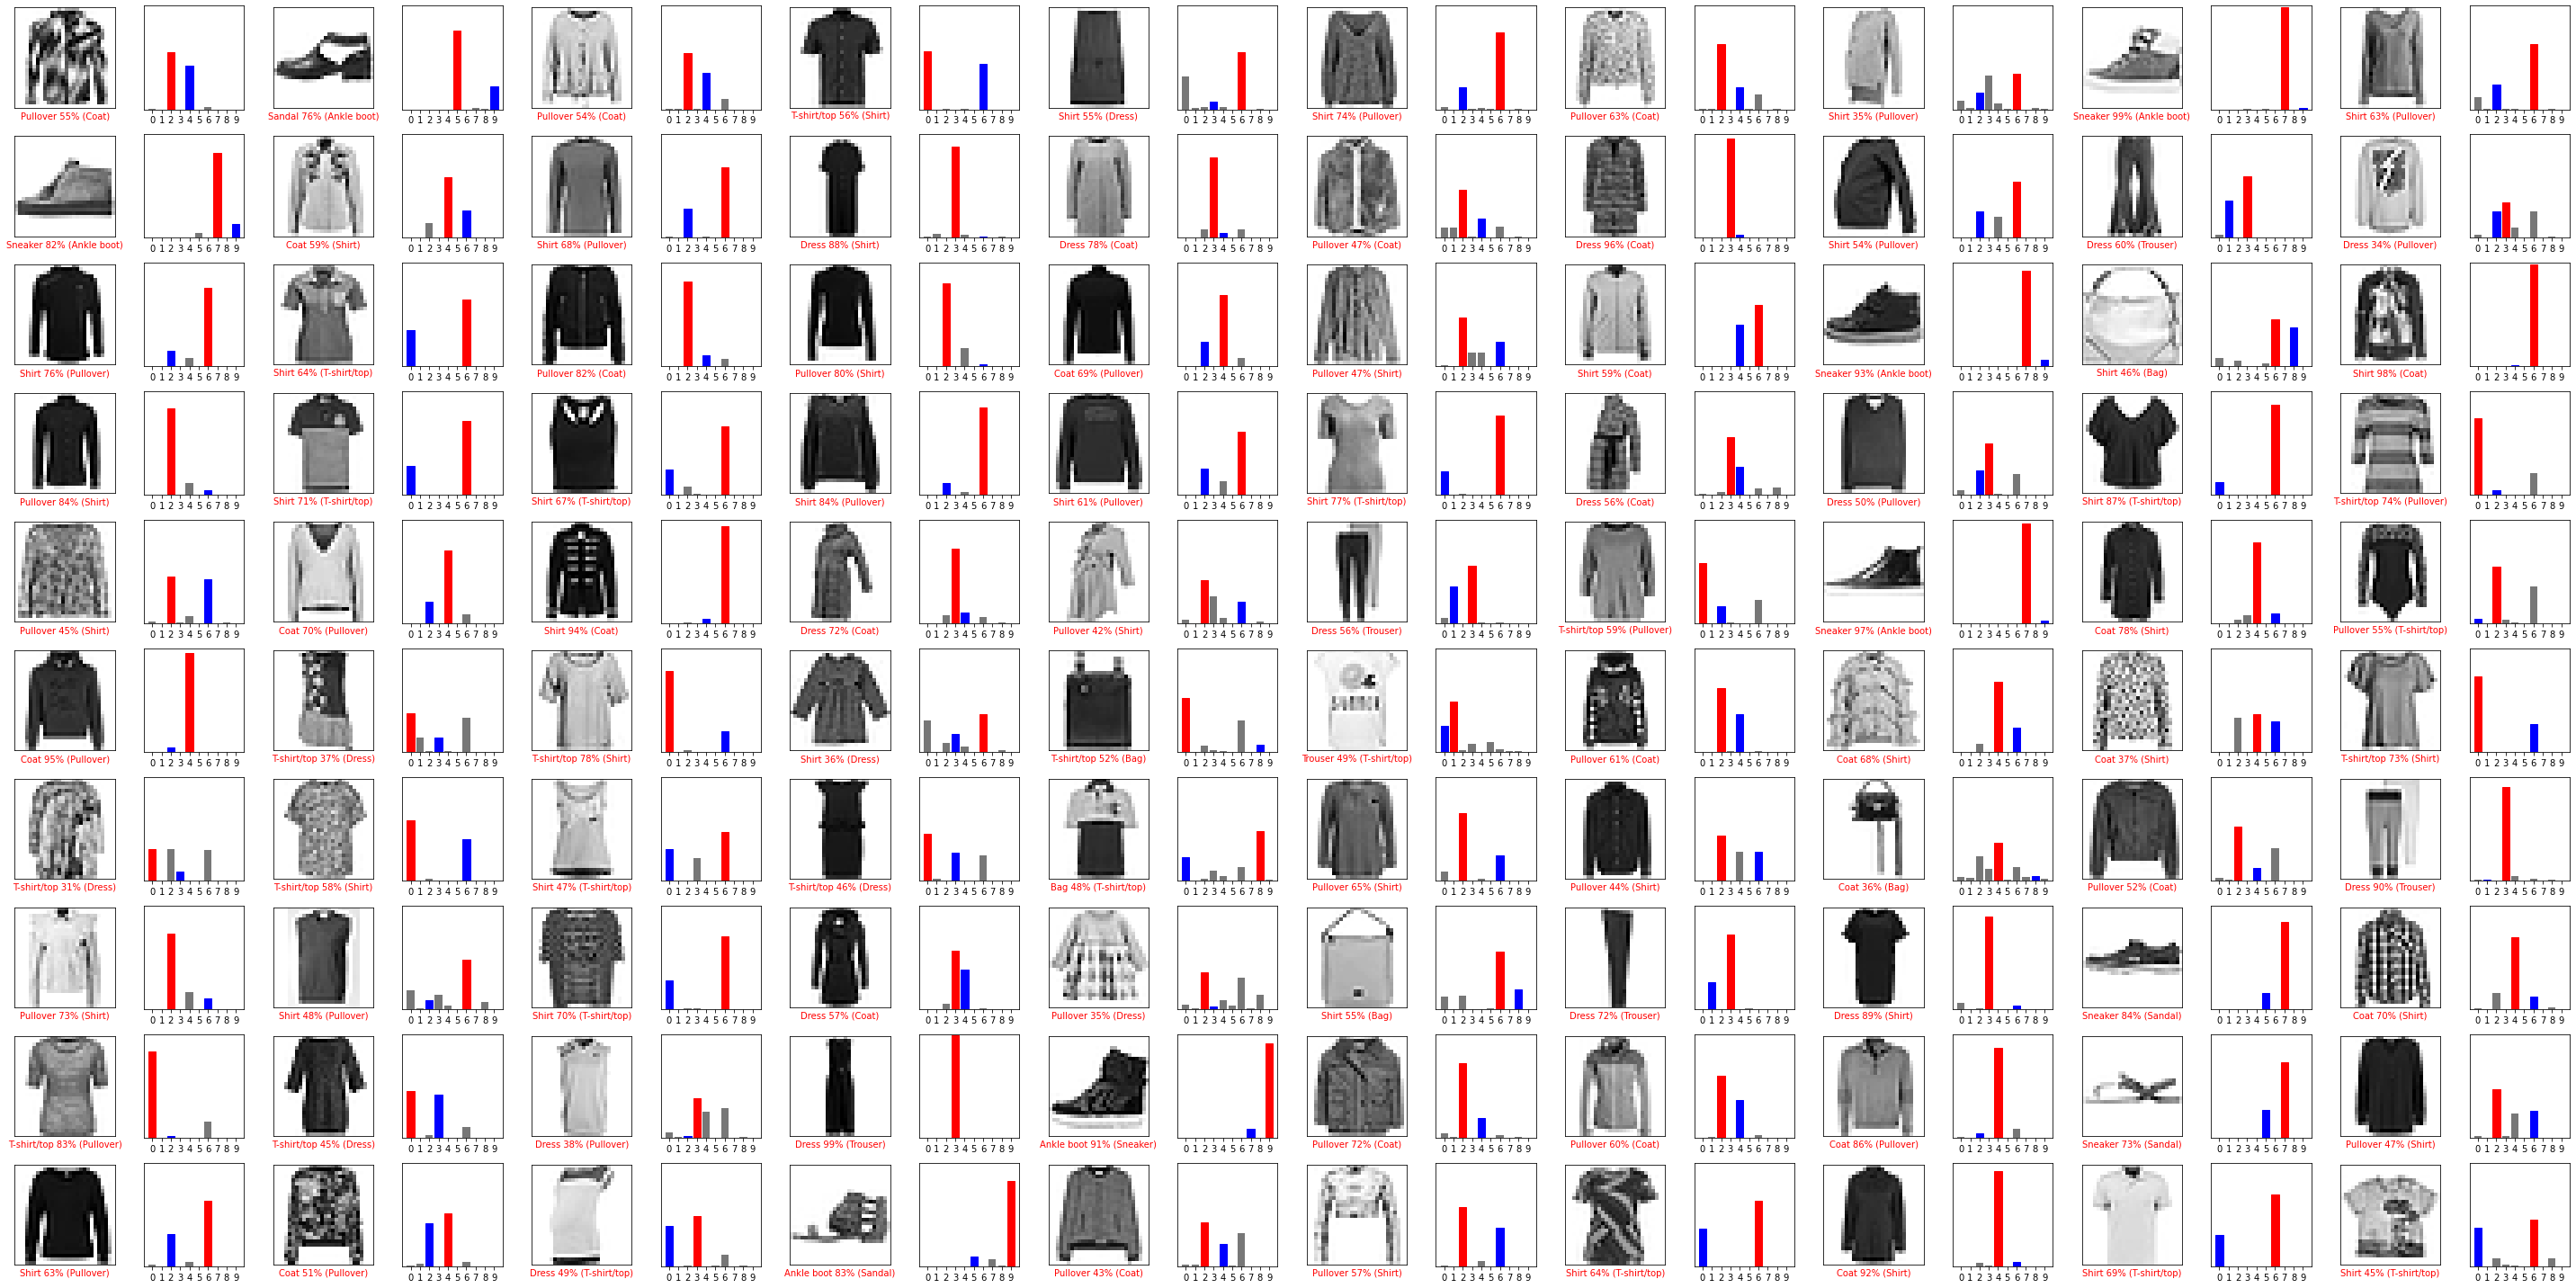

In [ ]:
#plot the first 100 images that were incorrectly classified
num_rows = 10
num_cols = 10
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(incorrectly_classified[i], predictions[incorrectly_classified[i]], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(incorrectly_classified[i], predictions[incorrectly_classified[i]], test_labels)
plt.tight_layout()
plt.show()

It looks like the model is incorrectly classifing tops more than anything. Such as mistaking coats, dresses, pullovers, and shirts. I also notice that it is very confident that some of the sneakers are ankle boots! 